In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as colors
import seaborn as sns
import seaborn as sns
sns.set(rc={"axes.facecolor":"#F9F9F9", "figure.facecolor":"#F9F9F9"})
palette = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251"]
sns.set_palette(palette)
cmap = colors.ListedColormap(palette)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
data = pd.read_csv('Mall_Customers.csv')

In [7]:
data.shape

(200, 5)

In [8]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.rename(columns = {'Genre':'Gender'} , inplace = True)

In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
data.drop(labels = 'CustomerID' , axis = 1 , inplace = True)

In [13]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [15]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [16]:
data['Gender'].replace({'Male':1 , 'Female':0} , inplace = True)

C:\Users\Usman\AppData\Local\Temp\ipykernel_18500\2209433099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({'Male':1 , 'Female':0} , inplace = True)
C:\Users\Usman\AppData\Local\Temp\ipykernel_18500\2209433099.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gen

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [18]:
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


<Axes: >

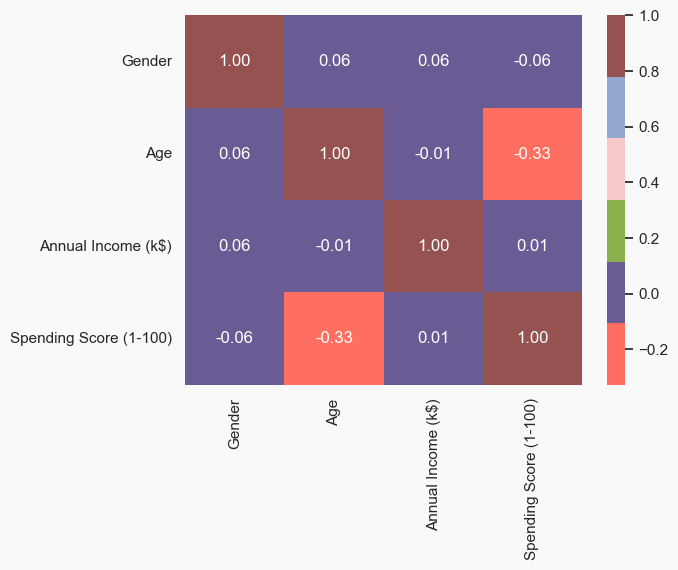

In [19]:
sns.heatmap(data = data.corr() , annot = True , fmt = '.2f' , cmap = cmap)

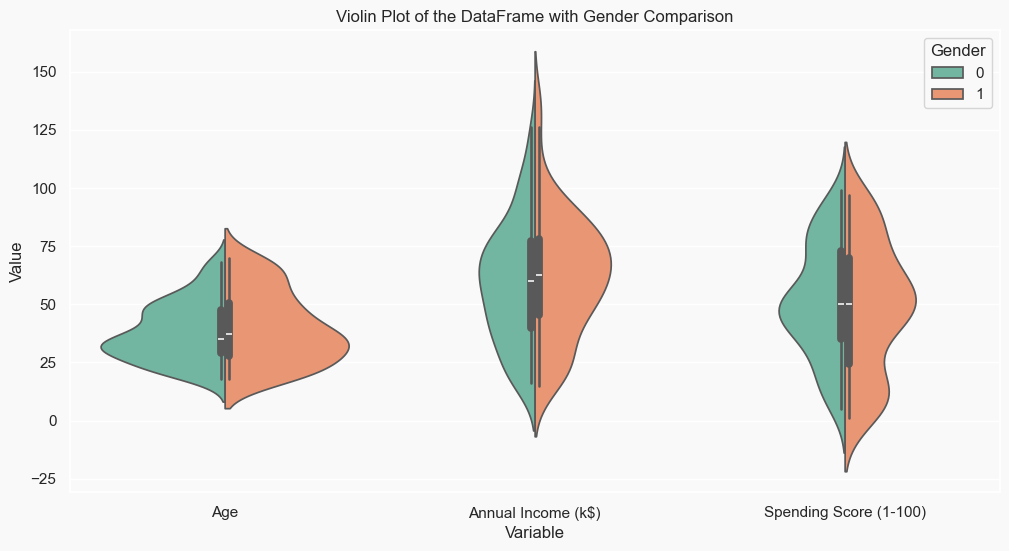

In [20]:
df_long = pd.melt(data, id_vars=["Gender"], 
                  value_vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],
                  var_name="Variable", value_name="Value")

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_long, x="Variable", y="Value", hue="Gender", split=True, palette="Set2")
plt.title("Violin Plot of the DataFrame with Gender Comparison")
plt.show()

Text(0.5, 1.0, 'Customer Gender Distribution')

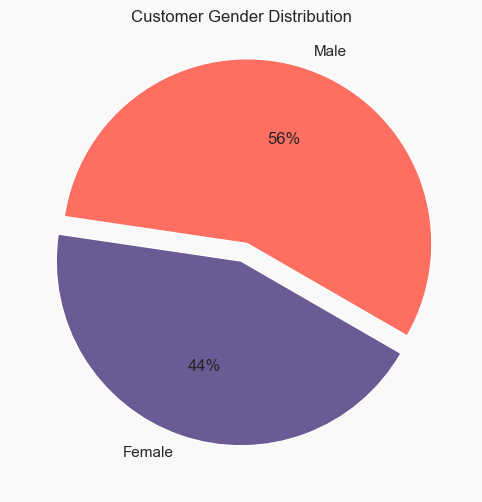

In [21]:
plt.figure(figsize=(10,6))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], 
        startangle=-30, explode=[0.1, 0], autopct='%.0f%%')
plt.title("Customer Gender Distribution")

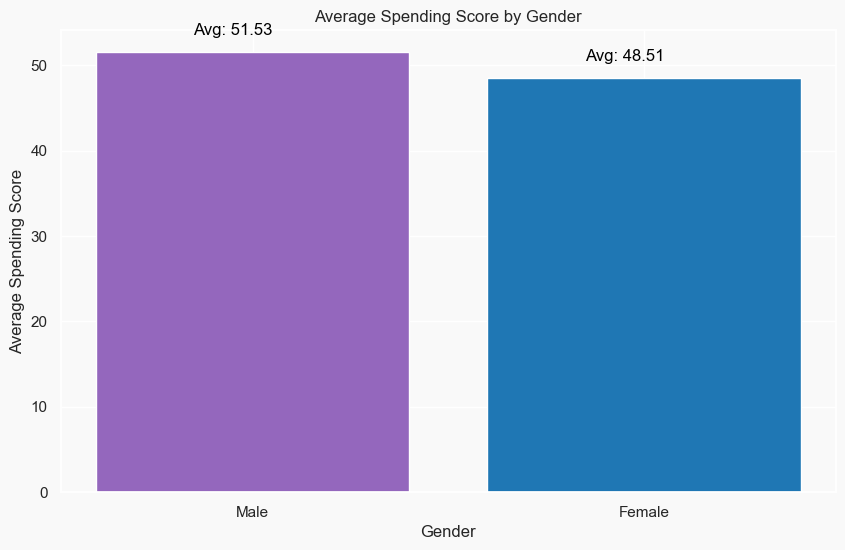

In [22]:
plt.figure(figsize=(10,6))
avg_scores = data.groupby('Gender')['Spending Score (1-100)'].mean()
plt.bar(x=['Male', 'Female'], height=avg_scores, color=['tab:purple', 'tab:blue'])
plt.title('Average Spending Score by Gender')
plt.ylabel('Average Spending Score')
plt.xlabel('Gender')

# Annotating the average scores on the bar chart
for i, score in enumerate(avg_scores):
    plt.text(i - 0.05, score + 2, f'Avg: {score:.2f}', ha='center', color='black')

# Display the plots
plt.show()

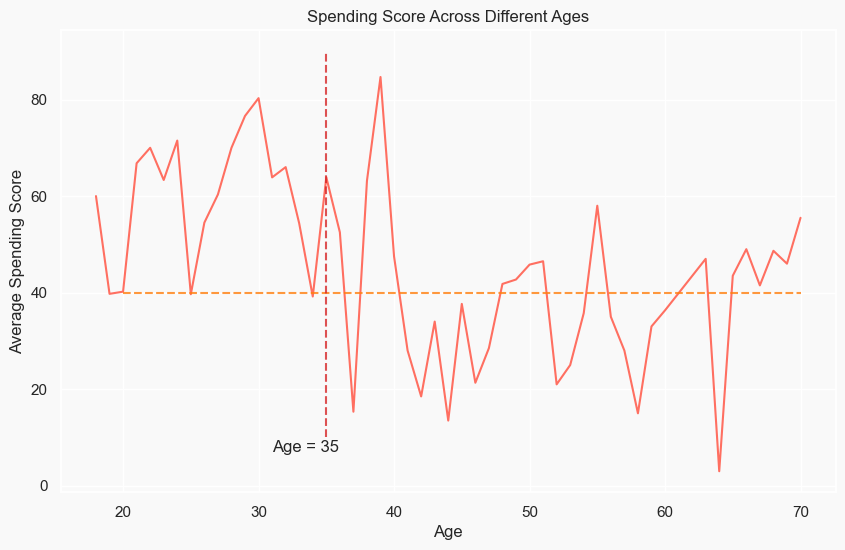

In [23]:
# List of unique ages from the dataset
ageList = data['Age'].unique()
ageList.sort()

# List to hold average spending scores
avgSpendingList = []

# Calculating the average spending score for each age
for age in ageList:
    avgSpending = data[data['Age'] == age]['Spending Score (1-100)'].mean()
    avgSpendingList.append(avgSpending)

# Plotting the age vs average spending score
plt.figure(figsize=(10,6))
plt.plot(ageList, avgSpendingList)
plt.xlabel('Age')
plt.ylabel('Average Spending Score')
plt.title('Spending Score Across Different Ages')

# Adding a horizontal dashed line
plt.plot([20, 70], [40, 40], linestyle='--', color='tab:orange', alpha=0.8)

# Adding a vertical dashed line
plt.plot([35, 35], [10, 90], linestyle='--', color='tab:red', alpha=0.8)

# Adding a text label for the vertical line
plt.text(31, 7, 'Age = 35')

# Displaying the plot
plt.show()

In [24]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

In [25]:
pca = PCA(n_components = 2)
PCAdata = pca.fit_transform(data_scaled)
print("Data's shape after PCA :",PCAdata.shape)

Data's shape after PCA : (200, 2)


C:\Users\Usman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

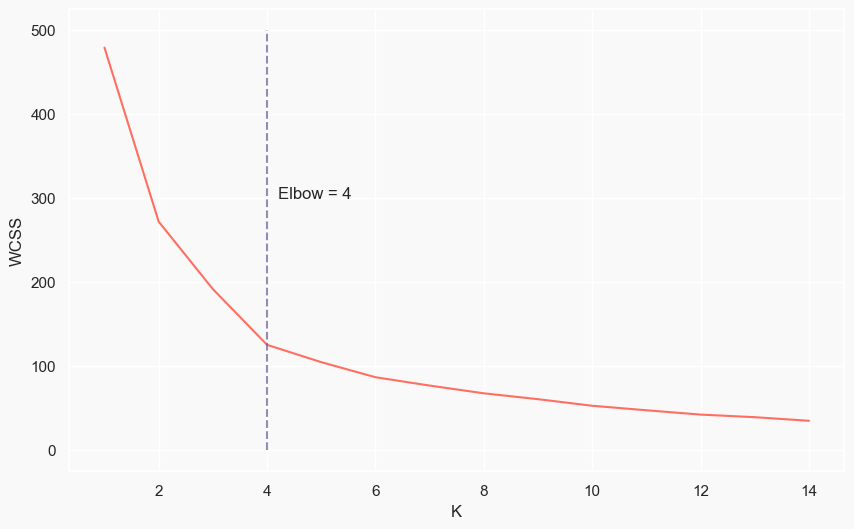

In [26]:
plt.figure(figsize=(10,6))
wcss_list = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i , init = 'k-means++'  , random_state = 1)
    kmeans.fit(PCAdata) 
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,15) , wcss_list)
plt.plot([4,4] , [0 , 500] , linestyle = '--' , alpha = 0.7)
plt.text(4.2 , 300 , 'Elbow = 4')
plt.xlabel('K' )
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++'  , random_state = 1)
kmeans.fit(PCAdata)
cluster_pred = kmeans.predict(PCAdata)

C:\Users\Usman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
resultData = pd.DataFrame()
resultData['PC1'] = PCAdata[:,0]
resultData['PC2'] = PCAdata[:,1]
resultData['ClusterID'] = cluster_pred

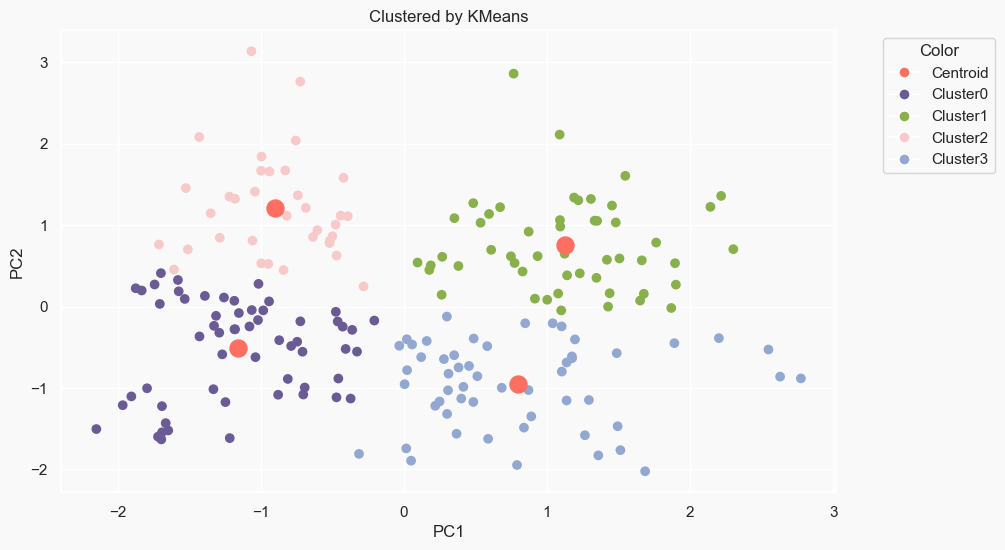

In [29]:
plt.figure(figsize=(10,6))

# Updating the color palette
palette = {"Centroid":"#FF6F61", "Cluster0":"#6B5B95", "Cluster1":"#88B04B", 
           "Cluster2":"#F7CAC9", "Cluster3":"#92A8D1"}

# Mapping cluster IDs to colors
resultData['ClusterColor'] = resultData['ClusterID'].map({0: "#6B5B95", 1: "#88B04B", 
                                                          2: "#F7CAC9", 3: "#92A8D1"})

# Plotting clusters
plt.scatter(x=resultData['PC1'], y=resultData['PC2'], c=resultData['ClusterColor'])

# Creating legend handles
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) 
           for k, v in palette.items()]
plt.legend(title='Color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting centroids
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
            marker='o', c='#FF6F61', s=150, alpha=1)

# Setting plot title and labels
pltFont = {'family':'serif', 'size':14}
plt.title("Clustered by KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Applying seaborn style
sns.set(rc={"axes.facecolor":"#F9F9F9", "figure.facecolor":"#F9F9F9"})

# Displaying the plot
plt.show()

Linear Regression Model Performance:
Cross-Validated Scores: [ 0.18767216 -1.32707823 -6.62722549  0.04962083  0.12415531]
Mean Cross-Validated Score: -1.52
Mean Squared Error (MSE) on Test Set: 468.05
R-Squared (R²) on Test Set: 0.05

Regression Coefficients: [-0.59177448]
Intercept: 74.80242451588705

--- Detailed Statistics ---
Slope: -0.59
Intercept: 74.80
R-Value: -0.31
P-Value: 0.00
Standard Error: 0.14


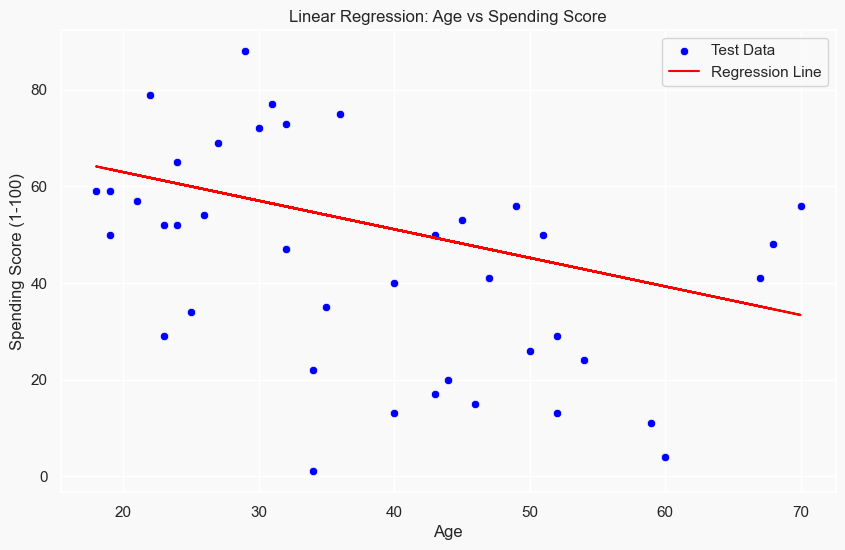

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

X = data[['Age']]
y = data['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cv_scores = cross_val_score(model, X, y, cv=5)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Model Performance:')
print(f'Cross-Validated Scores: {cv_scores}')
print(f'Mean Cross-Validated Score: {np.mean(cv_scores):.2f}')
print(f'Mean Squared Error (MSE) on Test Set: {mse:.2f}')
print(f'R-Squared (R²) on Test Set: {r2:.2f}')

print(f'\nRegression Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

slope, intercept, r_value, p_value, std_err = stats.linregress(X_train.squeeze(), y_train)

print("\n--- Detailed Statistics ---")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-Value: {r_value:.2f}")
print(f"P-Value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Age'], y=y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [32]:
import pandas as pd
from scipy.stats import skew

# Load your data into a DataFrame (replace 'path_to_file.csv' with your file path)
data = pd.read_csv('Mall_Customers.csv')

# Selecting the relevant columns
columns_to_analyze = ['Age', 'Annual Income (k$)']

# Calculating the required statistics
stats = {}
for column in columns_to_analyze:
    stats[column] = {
        'Mean': data[column].mean(),
        'Median': data[column].median(),
        'Standard Deviation': data[column].std(),
        'Skewness': skew(data[column])
    }

# Convert the statistics into a DataFrame for better visualization
stats_df = pd.DataFrame(stats).T

# Display the DataFrame
print(stats_df)

# Optional: Save the DataFrame to a CSV file
stats_df.to_csv('statistical_analysis.csv', index=True)


                     Mean  Median  Standard Deviation  Skewness
Age                 38.85    36.0           13.969007  0.481919
Annual Income (k$)  60.56    61.5           26.264721  0.319424


In [36]:
import pandas as pd
from scipy.stats import skew

# Assuming the dataset is loaded as data_new
columns_to_analyze = ['Annual Income (k$)', 'Spending Score (1-100)']

# Calculating the required statistics
stats_new = {}
for column in columns_to_analyze:
    stats_new[column] = {
        'Mean': data_new[column].mean(),
        'Median': data_new[column].median(),
        'Standard Deviation': data_new[column].std(),
        'Skewness': skew(data_new[column])
    }

# Convert the statistics into a DataFrame
stats_new_df = pd.DataFrame(stats_new).T

# Display the DataFrame
print(stats_new_df)

# Optionally save the DataFrame to a file
stats_new_df.to_csv('statistical_analysis.csv', index=True)


                         Mean  Median  Standard Deviation  Skewness
Annual Income (k$)      60.56    61.5           26.264721  0.319424
Spending Score (1-100)  50.20    50.0           25.823522 -0.046865
